In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

In [7]:
to_plot = [np.ones((45, 45)) * (i + 1) for i in range(18)]

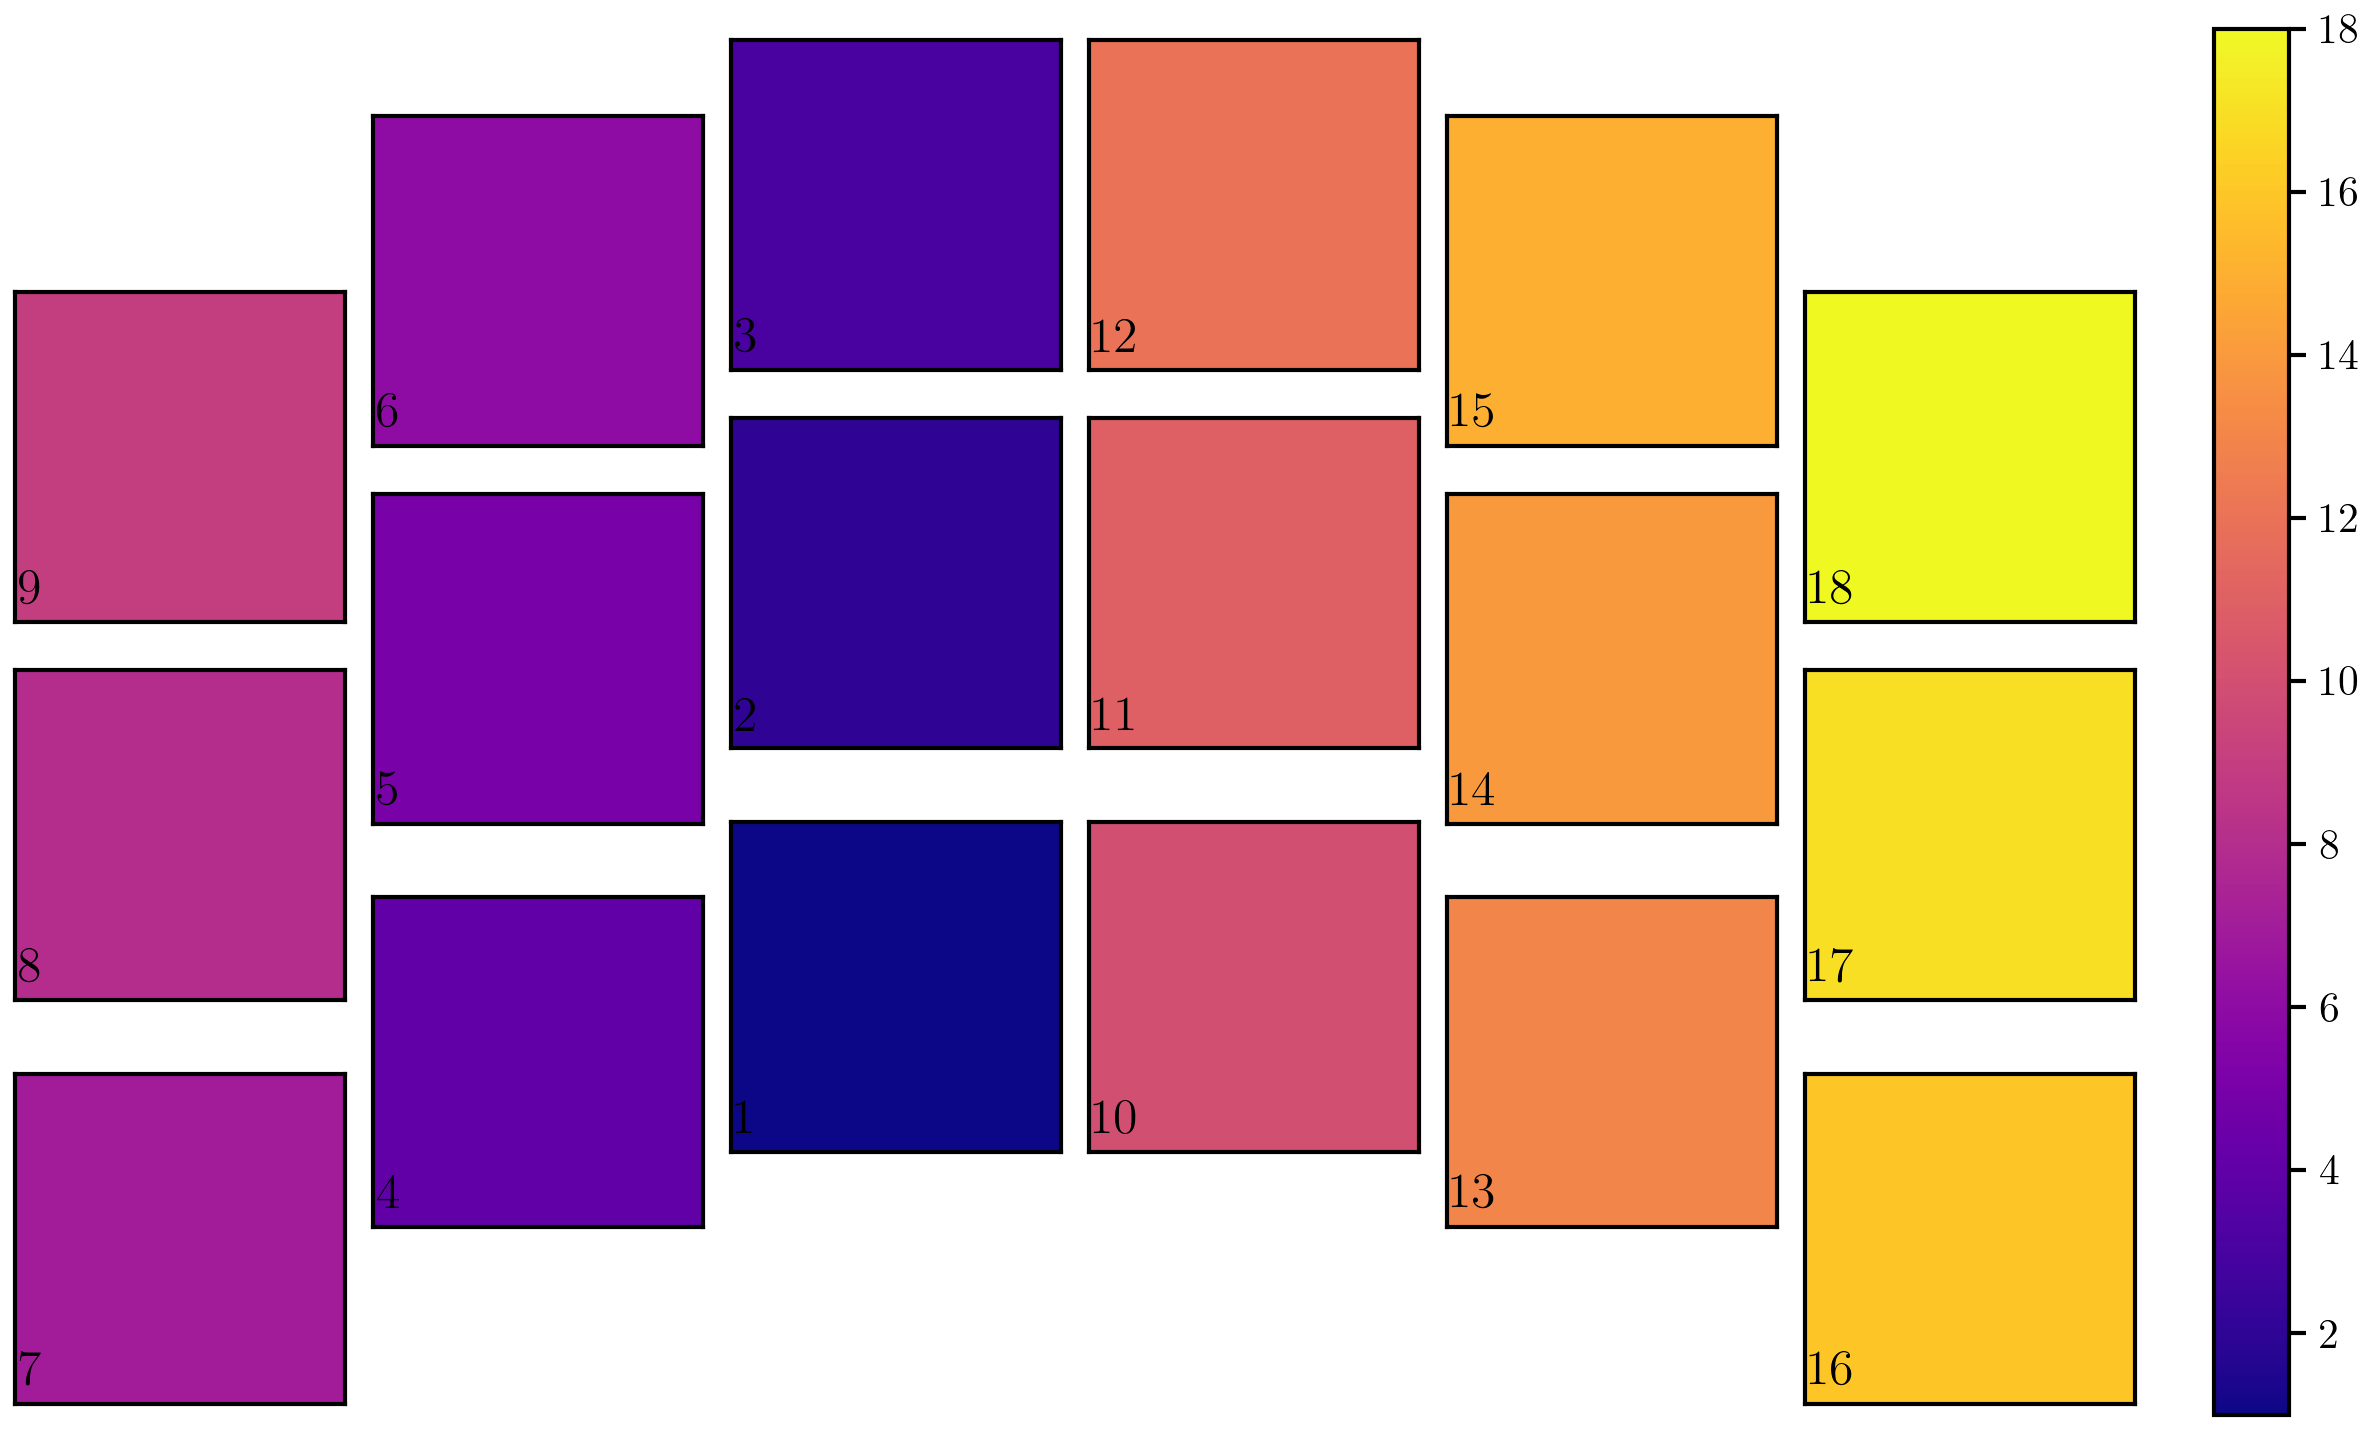

In [9]:
show_sca_id = True
savefig = False
savepath = 'roman_sca.png'
clabel = None
title = None

detector = plt.figure(figsize=(10,6),dpi=300)
nrows, ncols = 55,91
grid = detector.add_gridspec(nrows=nrows,ncols=ncols,figure=detector, 
                                width_ratios=[1]*ncols, height_ratios=[1]*nrows,
                                hspace=0,wspace=0.1)
row_begins = np.array([10,3,0,0,3,10])
row_ends = np.array([x+14 for x in row_begins])
col_begins = np.arange(0,ncols,14)
col_ends = np.array([x+14 for x in col_begins])
add_distance = [15,16,16]

axs = []
for row in add_distance:
    for i in range(len(row_begins)):
        ax = detector.add_subplot(grid[row_begins[i]:row_ends[i],col_begins[i]+1:col_ends[i]])
        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        axs.append(ax)

    row_begins += row
    row_ends += row

# Argument data_array should be an array of len(N SCAs) containing arrays:
# data_array = np.array([np.random.rand(14,14)]*len(axs))  # TODO this is fake data
data_array = np.array(to_plot)
vmin = np.nanmin(data_array.ravel())
vmax = np.nanmax(data_array.ravel())

# sortidx = sca_order.argsort()
# sca_order = sca_order[sortidx]
# data_array = data_array[sortidx]
imsim_sca_order = np.array([9,6,3,12,15,18,8,5,2,11,14,17,7,4,1,10,13,16])-1

for i, sca in enumerate(imsim_sca_order):
    im = axs[i].imshow(data_array[sca], cmap='plasma', vmin=vmin,vmax=vmax)  # 
        
    if show_sca_id:
        axs[i].annotate(sca+1, xy=(0,2), fontsize=12)

cbar_ax = detector.add_subplot(grid[:,-4:-1])
cbar = plt.colorbar(im, cax=cbar_ax)
if clabel is not None:
    cbar.set_label(clabel, labelpad=20, fontsize=18, rotation=270)
if title is not None:
    plt.suptitle(title, y=0.93, fontsize=18)
if savefig:
    plt.savefig(savepath, dpi=300, bbox_inches='tight')

plt.show()